In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [2]:

df = pd.read_excel(r'C:\Users\GANPATI\OneDrive\Desktop\study material\ML resources\ML Practical\default of credit card clients.xls',header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
x= df.iloc[:,0:-1]
y= df.iloc[:,-1]
x

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29999,80000,1,3,1,41,1,-1,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
x = StandardScaler().fit(x).transform(x.astype(float))

In [6]:
x

array([[-1.73199307, -1.13672015,  0.81016074, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-1.7318776 , -0.3659805 ,  0.81016074, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-1.73176213, -0.59720239,  0.81016074, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [ 1.73176213, -1.05964618, -1.23432296, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [ 1.7318776 , -0.67427636, -1.23432296, ..., -0.18512036,
         3.15253642, -0.19190359],
       [ 1.73199307, -0.90549825, -1.23432296, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train.shape

(21000, 24)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc = RandomForestClassifier(n_estimators=20,max_depth=10).fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [10]:
accuracy_score(y_test,y_pred)

0.8148888888888889

In [11]:
accuracy_score(y_train,rfc.predict(x_train))


0.8565238095238096

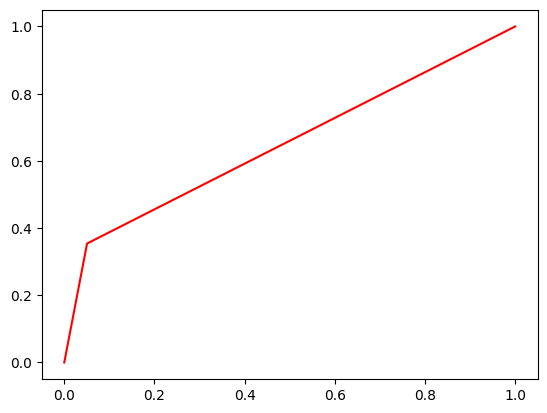

In [12]:
fpr,tpr,th = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color = 'red',label = 'ROC')
plt.show()

In [13]:
roc_auc_score(y_test,y_pred)

0.6517255747893054

In [14]:
from sklearn.ensemble import AdaBoostClassifier

In [15]:
ADBS = AdaBoostClassifier().fit(x_train,y_train)

In [16]:
y_pred_abc = ADBS.predict(x_test)
print(accuracy_score(y_pred_abc,y_test))

0.8122222222222222


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
gbc = GradientBoostingClassifier().fit(x_train,y_train)

In [19]:
y_p_gbc = gbc.predict(x_test)
print(accuracy_score(y_p_gbc,y_test))

0.818


In [20]:
accuracy_score(gbc.predict(x_train),y_train)

0.828

In [21]:
from xgboost import XGBClassifier

In [23]:
xgbc = XGBClassifier().fit(x_train,y_train)

In [24]:
accuracy_score(xgbc.predict(x_test),y_test)

0.812

In [25]:
from sklearn.ensemble import StackingClassifier

In [26]:
est = [('rf',RandomForestClassifier(n_estimators=20,max_depth=10,random_state=42)),('gb',GradientBoostingClassifier()),('ad',AdaBoostClassifier())]

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
sc = StackingClassifier(estimators=est,final_estimator=LogisticRegression(),cv=10)

In [29]:
sc.fit(x_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=20,
                                                       random_state=42)),
                               ('gb', GradientBoostingClassifier()),
                               ('ad', AdaBoostClassifier())],
                   final_estimator=LogisticRegression())

In [30]:
y_stack = sc.predict(x_test)
print(accuracy_score(y_stack,y_test))

0.8165555555555556


In [31]:
lrm = LogisticRegression().fit(x_train,y_train)
print(accuracy_score(lrm.predict(x_test),y_test))

0.8051111111111111


In [32]:
sc3 = StackingClassifier(estimators=est,final_estimator=RandomForestClassifier(),cv=10)
sc3.fit(x_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=20,
                                                       random_state=42)),
                               ('gb', GradientBoostingClassifier()),
                               ('ad', AdaBoostClassifier())],
                   final_estimator=RandomForestClassifier())

In [33]:
y_stack3 = sc3.predict(x_test)
print(accuracy_score(y_stack3,y_test))

0.8075555555555556


In [47]:
est2 = [('lrm1',LogisticRegression()),('lrm3',LogisticRegression()),('lrm4',LogisticRegression()),('lrm5',LogisticRegression()),('lrm6',LogisticRegression()),('lrm',LogisticRegression())]

In [50]:
sc4 = StackingClassifier(estimators=est2,final_estimator=RandomForestClassifier(),cv=10)

In [52]:
sc4.fit(x_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('lrm1', LogisticRegression()),
                               ('lrm3', LogisticRegression()),
                               ('lrm4', LogisticRegression()),
                               ('lrm5', LogisticRegression()),
                               ('lrm6', LogisticRegression()),
                               ('lrm', LogisticRegression())],
                   final_estimator=RandomForestClassifier())

In [53]:
y_stack4 = sc4.predict(x_test)
print(accuracy_score(y_stack4,y_test))

0.7127777777777777
